In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [5]:
#Collecting Data
data = pd.read_csv(r'Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.drop(columns=['Id', 'Species'], inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


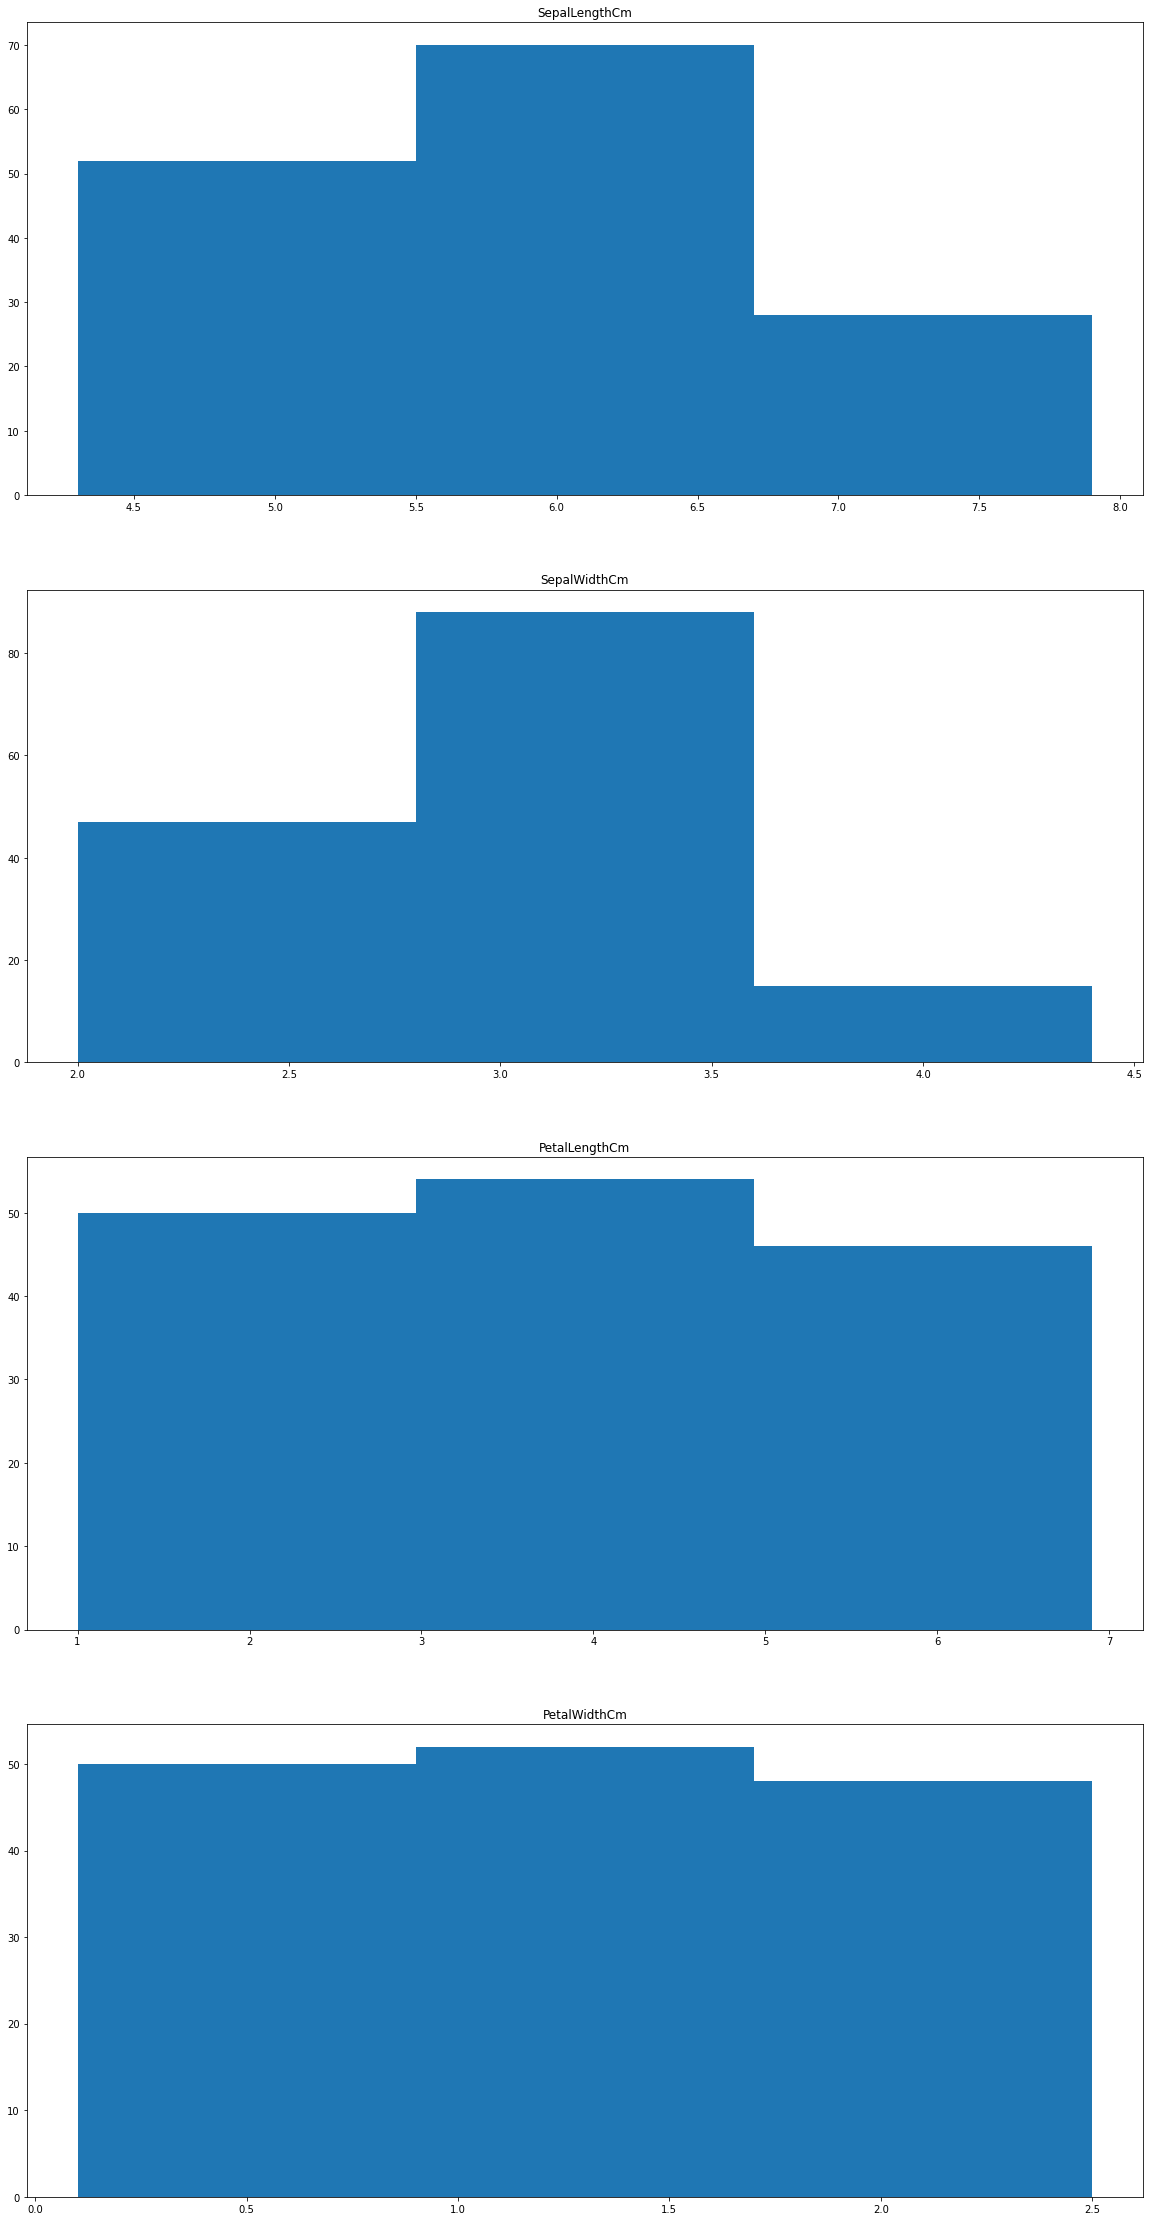

In [20]:
fig, axes = plt.subplots(4,1, figsize=(20,40))
for col, axis in zip(data.columns,axes):
    axis.hist(data[[col]], bins=3)
    axis.set_title(f'{col}')

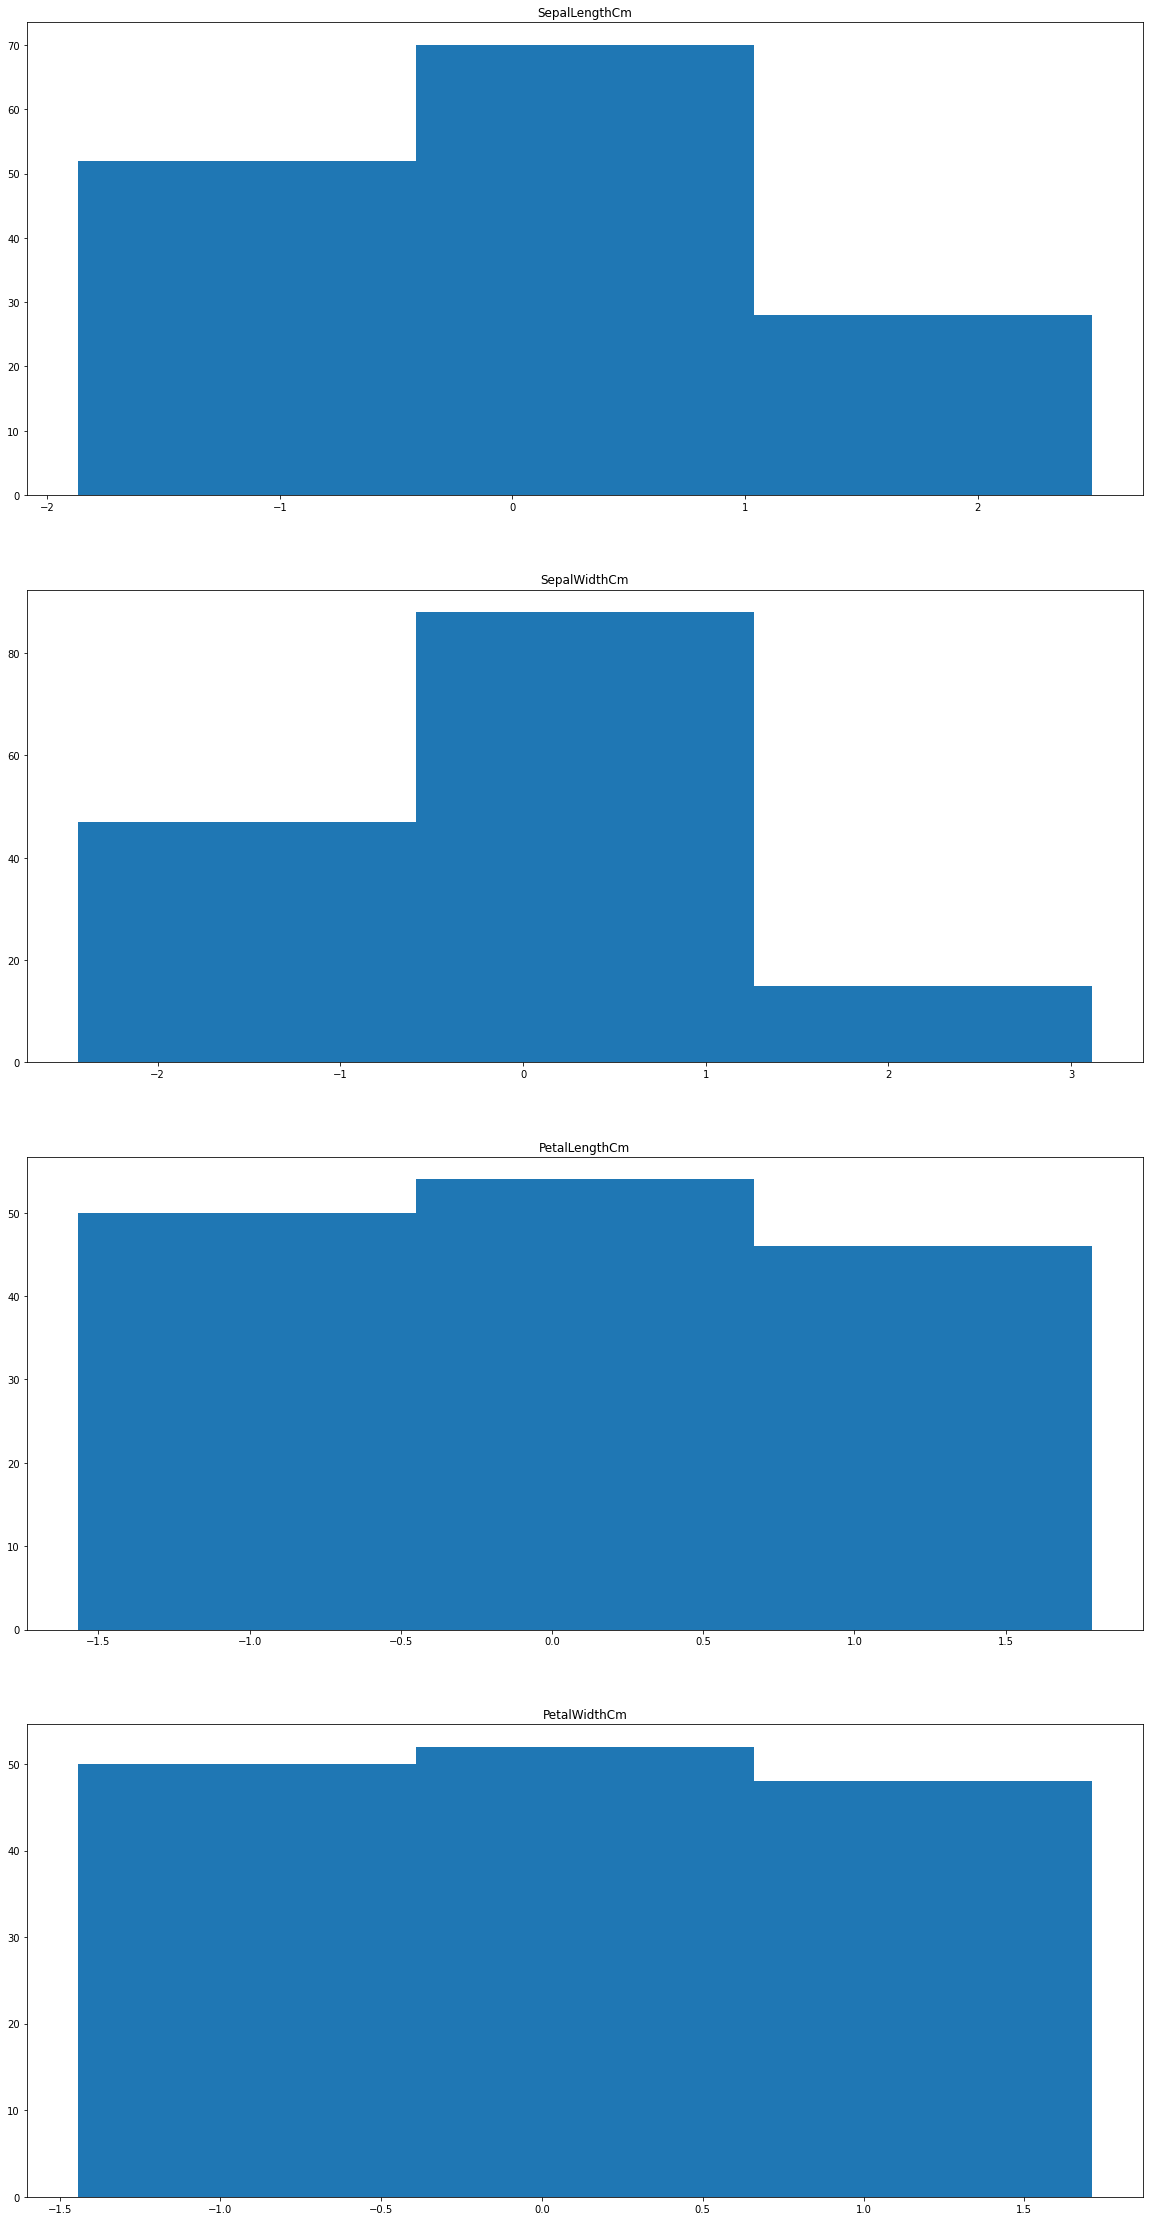

In [26]:
# Data Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(data)
# scaledX[:, 0]

fig1, axes1 = plt.subplots(4,1, figsize=(20,40))
for index, col, axis in zip(range(4), data.columns,axes1):
    axis.hist(scaledX[:, index], bins=3)
    axis.set_title(f'{col}')


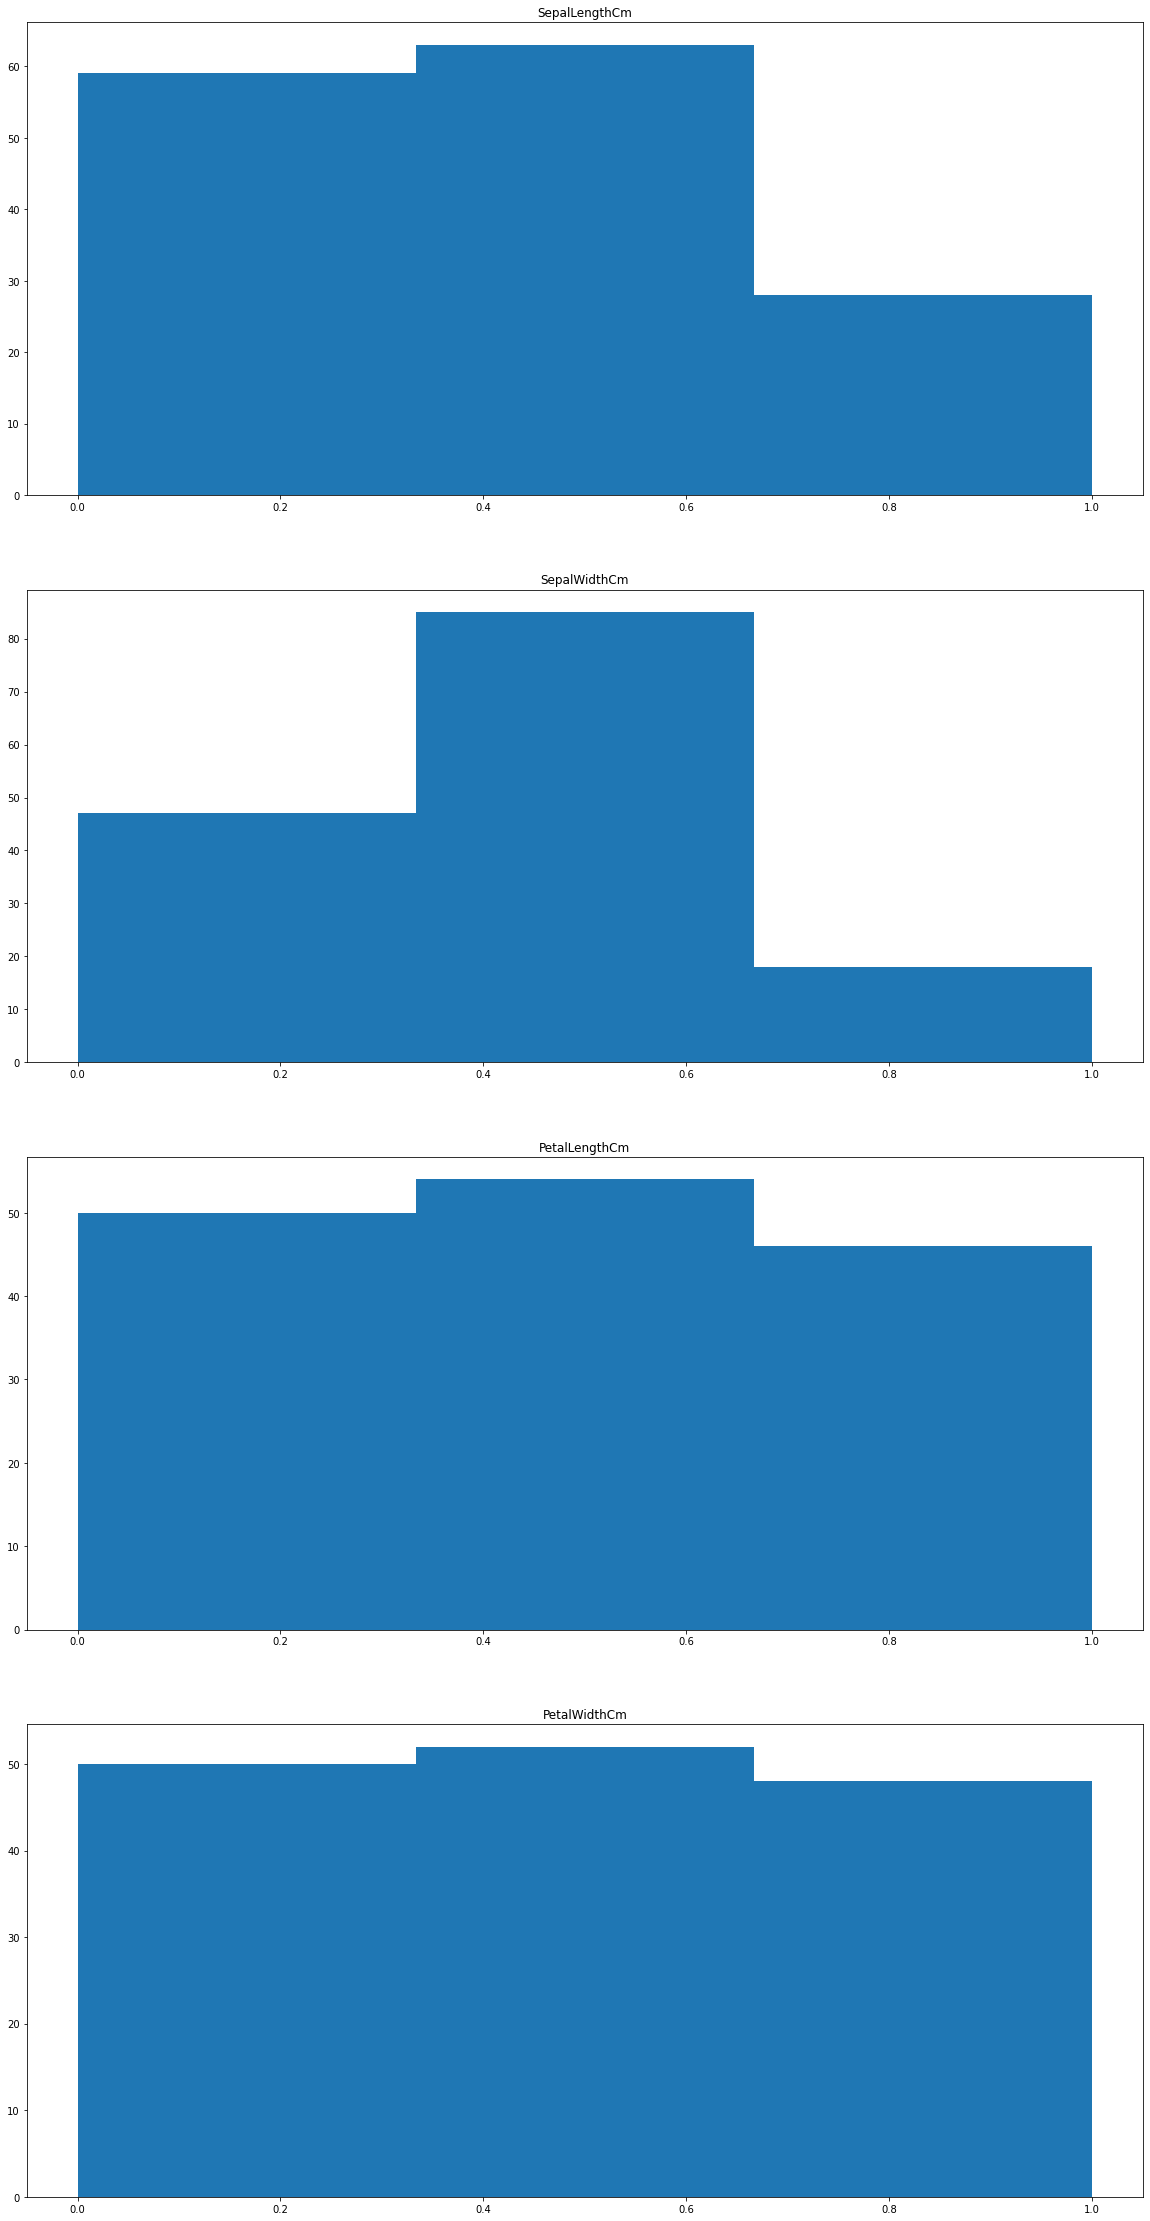

In [31]:
mscaler = MinMaxScaler()
mscaledX = mscaler.fit_transform(data)
# scaledX[:, 0]

fig2, axes2 = plt.subplots(4,1, figsize=(20,40))
for index, col, axis in zip(range(4), data.columns,axes2):
    axis.hist(mscaledX[:, index], bins=3)
    axis.set_title(f'{col}')

In [33]:
### Split
from sklearn.model_selection import train_test_split

xtrain, xtest = train_test_split(scaledX, test_size=0.2, random_state=1)
xtrain.shape, xtest.shape

((120, 4), (30, 4))

In [42]:
## Modeling

from sklearn.cluster import KMeans

model = KMeans()

model.fit(xtrain[:, 2:4])
model.labels_, model.inertia_

(array([ 3, 15,  0,  2, 40, 27, 25,  1, 30, 43,  2, 23, 38, 10, 31, 36, 44,
         1, 23, 37, 27,  1,  6,  2, 39, 35, 13, 16, 34,  7, 42, 26, 13, 18,
         1, 35, 23, 13, 26, 46, 31, 49, 13, 42, 21,  7, 10, 14,  5, 25, 27,
        18, 18,  2,  1,  9,  4, 47, 27, 48, 21, 18,  8,  7, 41, 11, 31, 11,
         5, 22, 12,  0, 23,  0, 38, 12,  3, 29, 20, 17, 26, 15,  1, 12, 13,
        27,  4, 42, 26, 16,  1, 11, 24, 25,  1, 33, 33,  1,  1, 14, 45, 32,
         3, 27, 30,  7, 30,  3,  4, 42, 42, 28, 25, 19, 33,  9, 10, 38, 17,
        18]),
 0.16594682447056616)

Text(0, 0.5, 'PetalWidth')

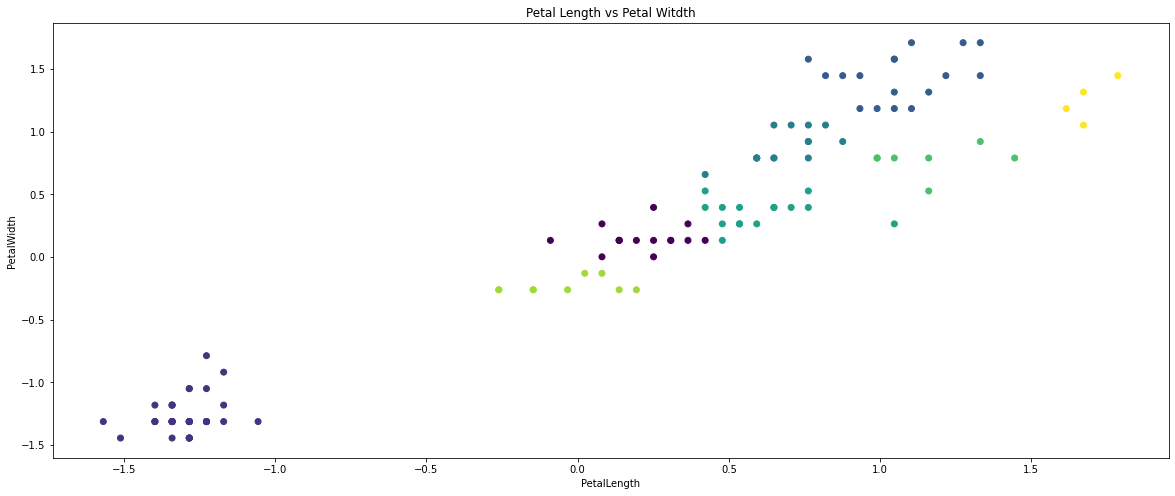

In [41]:
fig3, axes3 = plt.subplots(1,1, figsize=(20,8))
axes3.scatter(xtrain[:, 2], xtrain[:, 3], c=model.labels_)
axes3.set_title('Petal Length vs Petal Witdth')
axes3.set_xlabel('PetalLength')
axes3.set_ylabel('PetalWidth')


Inertia For 2 => 45.29401317112147
Inertia For 3 => 15.199046875735064
Inertia For 4 => 9.860934239060075
Inertia For 5 => 7.394695930832781
Inertia For 6 => 5.723854987086649
Inertia For 7 => 4.781195075340684
Inertia For 8 => 4.052632503472654
Inertia For 9 => 3.5165406516776194
Inertia For 10 => 2.9954021981911465
Inertia For 11 => 2.7609149540183524
Inertia For 12 => 2.5187630595678256
Inertia For 13 => 2.2916239996988486
Inertia For 14 => 2.1272157781564776


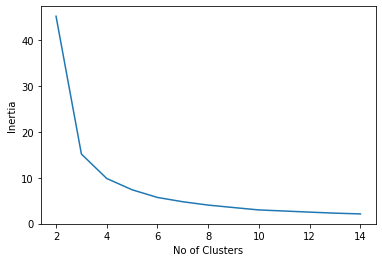

In [46]:
## Choosing K Value
inertia = []
for k in range(2,15):
    Model = KMeans(n_clusters=k)
    Model.fit(xtrain[:, 2:4])
    print(f'Inertia For {k} => {Model.inertia_}')
    inertia.append(Model.inertia_)

plt.plot(list(range(2,15)), inertia)
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.show()

[1 0 0 1 2 0 2 1 1 2 0 1 2 0 0 1 0 0 1 1 0 0 2 1 2 0 1 1 0 2]


Text(0, 0.5, 'PetalWidth')

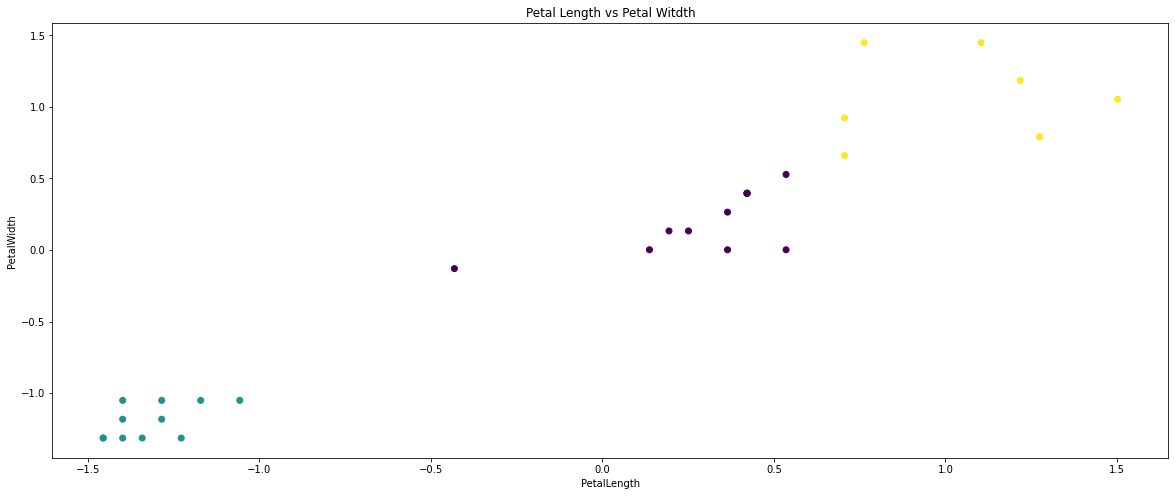

In [50]:
## Final Model
fmodel = KMeans(n_clusters=3)
fmodel.fit(xtrain[:, 2:4])
ypred = fmodel.predict(xtest[:, 2:4])
print(ypred)
fig4, axes4 = plt.subplots(1,1, figsize=(20,8))
axes4.scatter(xtest[:, 2], xtest[:, 3], c=ypred)
axes4.set_title('Petal Length vs Petal Witdth')
axes4.set_xlabel('PetalLength')
axes4.set_ylabel('PetalWidth')